In [1]:
%cd ..

/Users/mateoibarguen/Desktop/DATA 401/data_401_vodka


In [20]:
import numpy as np
import pandas as pd
from src.statistical_lr import StatLinearRegression
import seaborn as sns
import itertools

https://towardsdatascience.com/least-squares-linear-regression-in-python-54b87fc49e77

In [21]:
pd.set_option("display.max_columns", 500)

TODO

* fit regression model
* score a model based on the BIC metric
* get a cross-validated error for a model and the dataset
* dummify the categorical data
* add columns for the interaction terms and higher order terms


In [22]:
lr = StatLinearRegression()

In [5]:
df = pd.read_csv("data/vodka_df.csv")

In [6]:
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

In [7]:
y = df.iloc[:, -1]

In [8]:
X = df.iloc[:, 5:-1].values

In [9]:
X

array([[5.00741840e-01, 8.03427959e-04, 5.35618640e-04],
       [3.68355049e-01, 3.05302625e-03, 3.05302625e-03],
       [5.12524754e-01, 2.06595761e-03, 1.54946821e-03],
       ...,
       [5.00000000e-01, 1.57604413e-03, 3.94011032e-04],
       [5.00387055e-01, 1.58917783e-01, 2.74494353e-01],
       [5.00291955e-01, 2.19884423e-01, 5.39716312e-01]])

In [10]:
df.columns[:-1]

Index(['county', 'year', 'quarter', 'category', 'avg_bottle_volume',
       'avg_percent_markup', 'num_unique_stores_per_capita',
       'num_unique_vendors_per_capita'],
      dtype='object')

In [1]:
# itertools.combinations(df.columns[:-1])

In [11]:
df.columns[:-1]

Index(['county', 'year', 'quarter', 'category', 'avg_bottle_volume',
       'avg_percent_markup', 'num_unique_stores_per_capita',
       'num_unique_vendors_per_capita'],
      dtype='object')

In [12]:
df.iloc[:, 5:-1].columns

Index(['avg_percent_markup', 'num_unique_stores_per_capita',
       'num_unique_vendors_per_capita'],
      dtype='object')

In [13]:
lr.fit(X, y, df.iloc[:, 5:-1].columns)

In [14]:
lr.transform(X)

array([0.00774213, 0.00625056, 0.00813128, ..., 0.00769519, 0.06559027,
       0.12221514])

In [15]:
lr.coeffs

{'avg_percent_markup': 0.015242058431988509,
 'num_unique_stores_per_capita': -0.006707154068499838,
 'num_unique_vendors_per_capita': 0.21504716364135648}

NormaltestResult(statistic=14354.357676830836, pvalue=0.0)


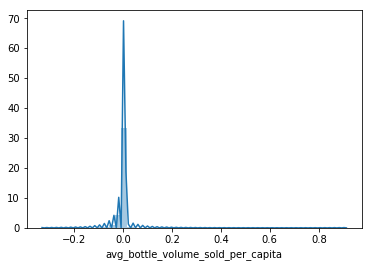

In [16]:
lr.plot_residuals()

In [14]:
df['avg_bottle_volume_sold_per_capita'].describe()

count    34896.000000
mean         0.019639
std          0.048556
min          0.000007
25%          0.000968
50%          0.003615
75%          0.016204
max          0.880360
Name: avg_bottle_volume_sold_per_capita, dtype: float64

In [11]:
n = X.shape[1]
r = np.linalg.matrix_rank(X)

In [12]:
U, sigma, VT = np.linalg.svd(X, full_matrices=False)

In [13]:
D_plus = np.diag(np.hstack([1/sigma[:r], np.zeros(n-r)]))

In [14]:
V = VT.T

In [17]:
X_plus = V.dot(D_plus).dot(U.T)

In [18]:
w = X_plus.dot(y)

In [16]:
print(w)

[ 0.01524206 -0.00670715  0.21504716]


In [21]:
fit_regression_model(df.iloc[:, 5:-1].values, df.iloc[:, -1].values)

array([nan, nan, nan])

In [20]:
def fit_regression_model(X, y):
    return (X.T * X).I * X.T * y

In [10]:
def get_sse(X, y, betas):
    y_hat = X * betas
    squared_errors = (y - X * betas)**2
    sse = sum(squared_errors)
    return sse

In [ ]:
# TODO - I'm not sure how to estimate sigma squared - how is this different from n?
def BIC(X, y, betas):
    n = X.shape[0]
    
    y_hat = X * betas
    squared_errors = (y - X * betas)**2
    sse = sum(squared_errors)
    
    
    penalty = len(betas) * np.log(n)
    
    # this is unfinished

    X.apply(lambda row : betas.dot(row))

In [ ]:
def get_cross_validated_prediction_error(X, y, num_folds):
    prediction_error_every_fold = []
    
    n = X.shape[0]
    
    observations_per_fold = np.ceil(n / num_folds)
    index_list = np.array(range(num_folds)).repeat(observations_per_fold)[:n]
    np.random.shuffle(index_list)
    
    for current_test_fold in range(num_folds):
        train_X = X[index_list != current_test_fold]
        train_y = y[index_list != current_test_fold]
        test_X = X[index_list == current_test_fold]
        test_y = y[index_list == current_test_fold]
        
        betas = fit_regression_model(train_X, train_y)
        prediction_error = get_sse(test_X, test_y, betas)
        
        prediction_error_every_fold.append(prediction_error)
        
    return prediction_error_every_fold / num_folds

In [25]:
def create_interaction_terms(df, on_columns):
    num_columns = len(on_columns)
    for i in range(num_columns):
        first_column_name = on_columns[i]
        for j in range(i, num_columns):
            second_column_name = on_columns[j]
            new_column_name = first_column_name + "_X_" + second_column_name
            
            df[new_column_name] = df[first_column_name] * df[second_column_name]

In [27]:
create_interaction_terms(df, ["avg_bottle_volume", "avg_percent_markup", "num_unique_stores_per_capita", "num_unique_vendors_per_capita"])

In [46]:
pd.get_dummies(df, columns=["county", "quarter", "category"], drop_first=True)

,year,avg_bottle_volume,avg_percent_markup,num_unique_stores_per_capita,num_unique_vendors_per_capita,avg_bottle_volume_sold_per_capita,county_ADAMS,county_ALLAMAKEE,county_APPANOOSE,county_AUDUBON,county_BENTON,county_BLACK HAWK,county_BOONE,county_BREMER,county_BUCHANAN,county_BUENA VIST,county_BUENA VISTA,county_BUTLER,county_CALHOUN,county_CARROLL,county_CASS,county_CEDAR,county_CERRO GORD,county_CERRO GORDO,county_CHEROKEE,county_CHICKASAW,county_CLARKE,county_CLAY,county_CLAYTON,county_CLINTON,county_CRAWFORD,county_DALLAS,county_DAVIS,county_DECATUR,county_DELAWARE,county_DES MOINES,county_DICKINSON,county_DUBUQUE,county_EL PASO,county_EMMET,county_FAYETTE,county_FLOYD,county_FRANKLIN,county_FREMONT,county_GREENE,county_GRUNDY,county_GUTHRIE,county_HAMILTON,county_HANCOCK,county_HARDIN,county_HARRISON,county_HENRY,county_HOWARD,county_HUMBOLDT,county_IDA,county_IOWA,county_JACKSON,county_JASPER,county_JEFFERSON,county_JOHNSON,county_JONES,county_KEOKUK,county_KOSSUTH,county_LEE,county_LINN,county_LOUISA,county_LUCAS,county_LYON,county_MADISON,county_MAHASKA,county_MARION,county_MARSHALL,county_MILLS,county_MITCHELL,county_MONONA,county_MONROE,county_MONTGOMERY,county_MUSCATINE,county_O'BRIEN,county_OBRIEN,county_OSCEOLA,county_PAGE,county_PALO ALTO,county_PLYMOUTH,county_POCAHONTAS,county_POLK,county_POTTAWATTA,county_POTTAWATTAMIE,county_POWESHIEK,county_RINGGOLD,county_SAC,county_SCOTT,county_SHELBY,county_SIOUX,county_STORY,county_TAMA,county_TAYLOR,county_UNION,county_VAN BUREN,county_WAPELLO,county_WARREN,county_WASHINGTON,county_WAYNE,county_WEBSTER,county_WINNEBAGO,county_WINNESHIEK,county_WOODBURY,county_WORTH,county_WRIGHT,quarter_2,quarter_3,quarter_4,category_anisette,category_brandy,category_cocktail,category_creme,category_gin,category_mezcal,category_other,category_package,category_rum,category_schnapps,category_spirit,category_tequila,category_triple sec,category_vodka,category_whiskey
0,2012,0.916667,0.500742,0.000803,0.000536,0.001540,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2012,0.660088,0.368355,0.003053,0.003053,0.004614,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2012,1.638889,0.512525,0.002066,0.001549,0.004969,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,0.750000,0.500000,0.000134,0.000134,0.000234,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,2012,0.976562,0.499606,0.001224,0.000918,0.001329,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
5,2012,0.750000,0.500000,0.000134,0.000134,0.000251,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
6,2012,1.031504,0.496610,0.011529,0.013176,0.010761,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7